In [2]:
import csv
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import random

In [3]:
# Copied from https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9
def augment_brightness_camera_images(image):
    image1 = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
    image1 = np.array(image1, dtype = np.float64)
    random_bright = .5+np.random.uniform()
    image1[:,:,2] = image1[:,:,2]*random_bright
    image1[:,:,2][image1[:,:,2]>255]  = 255
    image1 = np.array(image1, dtype = np.uint8)
    image1 = cv2.cvtColor(image1,cv2.COLOR_HSV2RGB)
    return image1

# Copied from https://chatbotslife.com/using-augmentation-to-mimic-human-driving-496b569760a9
def trans_image(image,steer,trans_range):
    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    steer_ang = steer + tr_x/trans_range*2*.2
    tr_y = 40*np.random.uniform()-40/2
    #tr_y = 0
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])
    rows, cols, dims = image.shape
    image_tr = cv2.warpAffine(image,Trans_M,(cols,rows))
    return image_tr, steer_ang


In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda
from keras.layers import Conv2D, MaxPooling2D, Cropping2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt


Using TensorFlow backend.


In [3]:
print('Reading data')
input_csvs = ['data/provided/driving_log.csv', \
        'data/lap_reverse/driving_log.csv']
        # 'data/curves/driving_log.csv']
lines = []
for filename in input_csvs:
    with open(filename, 'r') as csvfile:
        reader = csv.reader(csvfile)
        next(reader) # Skip header
        for line in reader:
            lines.append(line)
print(len(lines))

Reading data
10559


In [10]:
def random_image(lines):
    sampIdx = random.randint(0, len(lines))
    images = []
    for i in range(3):
        source_path = lines[sampIdx][i]
        filename = source_path.split('/')[-1]
        if len(source_path.split('/')) > 2:
            image_path = 'data/' + source_path.split('/')[-3] + '/IMG/'
        else:
            image_path = 'data/provided/IMG/'
        current_path = image_path + filename
        images.append(cv2.imread(current_path))
    return sampIdx, images

sampIdx, images = random_image(lines)
print(sampIdx)

8533


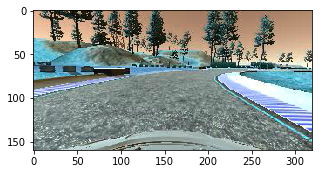

In [11]:
%matplotlib inline 
image = images[0]

plt.figure(figsize=(5,5))
plt.imshow(image)

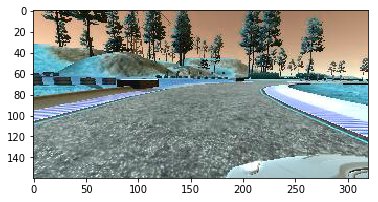

In [12]:
plt.imshow(images[1])

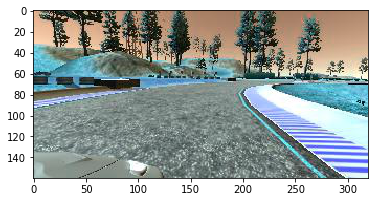

In [13]:
plt.imshow(images[2])

In [23]:
flipped = cv2.flip(image, 1)
brightened = augment_brightness_camera_images(image)
warped, measurement = trans_image(image, 0, 100)

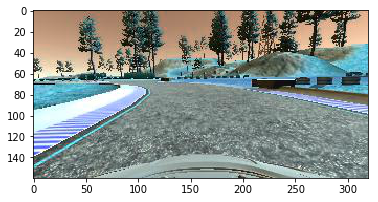

In [17]:
plt.imshow(flipped)

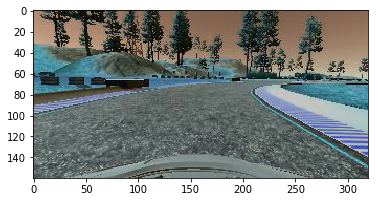

In [24]:
plt.imshow(brightened)

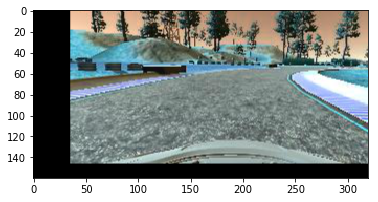

In [25]:
plt.imshow(warped)

## Load trained model and visualize the model

In [ ]:
from keras.models import load_model
model = load_model('model_checkpoint_02.hdf5')

In [ ]:
import pydot
from pydot import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))